In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Restaurant reviews.csv", engine='python')

In [ ]:
display(df.head())

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
reviews = df["Review"]

In [ ]:
reviews.head()

,Review
0,"The ambience was good, food was quite good . h..."
1,Ambience is too good for a pleasant evening. S...
2,A must try.. great food great ambience. Thnx f...
3,Soumen das and Arun was a great guy. Only beca...
4,Food is good.we ordered Kodi drumsticks and ba...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
from collections import Counter

all_tokens = []

for review in reviews:
    if pd.notnull(review):  # avoid NaN
        # Lowercase and tokenize
        tokens = word_tokenize(review.lower())

        # Remove stopwords and punctuation
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

        all_tokens.extend(filtered_tokens)

# Count frequency of keywords
keyword_freq = Counter(all_tokens)

print("Top 20 Keywords:")
print(keyword_freq.most_common(20))

Top 20 Keywords:
[('good', 7113), ('food', 6492), ('place', 5699), ('service', 3121), ('chicken', 3069), ('..', 2618), ('taste', 2234), ('ordered', 2169), ('ambience', 2007), ('great', 1960), ('one', 1910), ('...', 1831), ('really', 1661), ("n't", 1645), ('time', 1592), ('also', 1585), ('nice', 1481), ("'s", 1468), ('like', 1452), ('best', 1439)]


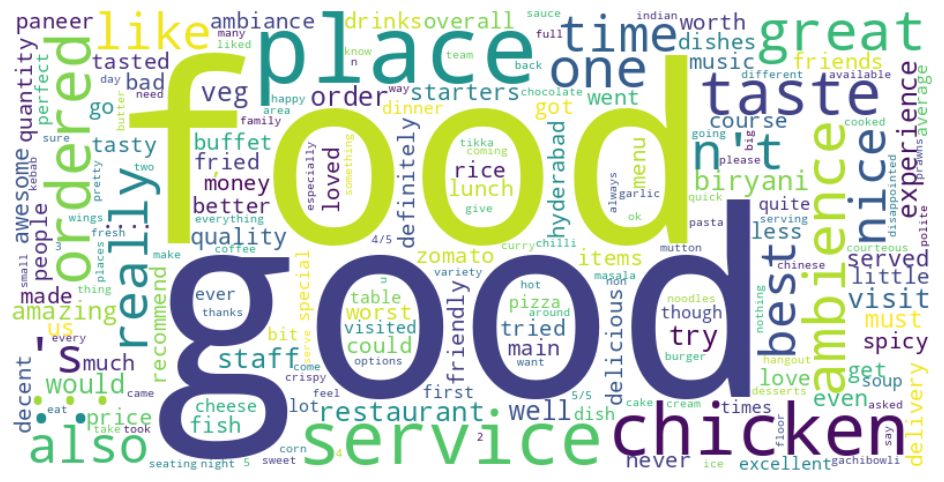

In [ ]:
from wordcloud import WordCloud
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(keyword_freq)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## In-Depth Analysis of Rating:

In [ ]:
# Masking the data - For personal use

unique_reviewers = df["Reviewer"].unique()
reviewer_map = {name: f"Reviewer_{i+1}" for i, name in enumerate(unique_reviewers)}

# Apply mapping
df["Reviewer"] = df["Reviewer"].map(reviewer_map)

print(df.head())

        Restaurant    Reviewer  \
0  Beyond Flavours  Reviewer_1   
1  Beyond Flavours  Reviewer_2   
2  Beyond Flavours  Reviewer_3   
3  Beyond Flavours  Reviewer_4   
4  Beyond Flavours  Reviewer_5   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0  


In [ ]:
# breaking time and date into Day,Month, Year , day of the week, and time - (Morning, afternoon, evening)

df['Time'] = pd.to_datetime(df['Time'])
df['Day'] = df['Time'].dt.day
df['Month'] = df['Time'].dt.month
df['Year'] = df['Time'].dt.year


df['Day_of_Week'] = df['Time'].dt.day_name()

In [ ]:
df["Only_Time"] = df["Time"].dt.time

# Function to classify time of day
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply function
df["Time_of_Day"] = df["Time"].dt.hour.apply(get_time_of_day)

In [ ]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Day,Month,Year,Day_of_Week,Only_Time,Time_of_Day
0,Beyond Flavours,Reviewer_1,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",2019-05-25 15:54:00,0,25.0,5.0,2019.0,Saturday,15:54:00,Afternoon
1,Beyond Flavours,Reviewer_2,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,25.0,5.0,2019.0,Saturday,14:20:00,Afternoon
2,Beyond Flavours,Reviewer_3,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,24.0,5.0,2019.0,Friday,22:54:00,Night
3,Beyond Flavours,Reviewer_4,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",2019-05-24 22:11:00,0,24.0,5.0,2019.0,Friday,22:11:00,Night
4,Beyond Flavours,Reviewer_5,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,24.0,5.0,2019.0,Friday,21:37:00,Night


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Restaurant   10000 non-null  object        
 1   Reviewer     10000 non-null  object        
 2   Review       9955 non-null   object        
 3   Rating       9962 non-null   object        
 4   Metadata     9962 non-null   object        
 5   Time         9962 non-null   datetime64[ns]
 6   Pictures     10000 non-null  int64         
 7   Day          9962 non-null   float64       
 8   Month        9962 non-null   float64       
 9   Year         9962 non-null   float64       
 10  Day_of_Week  9962 non-null   object        
 11  Only_Time    9962 non-null   object        
 12  Time_of_Day  10000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1015.8+ KB


In [ ]:
df['Day'] = df['Day'].fillna(0).astype(int)
df['Month'] = df['Month'].fillna(0).astype(int)
df['Year'] = df['Year'].fillna(0).astype(int)

display(df.head())

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Day,Month,Year,Day_of_Week,Only_Time,Time_of_Day
0,Beyond Flavours,Reviewer_1,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",2019-05-25 15:54:00,0,25,5,2019,Saturday,15:54:00,Afternoon
1,Beyond Flavours,Reviewer_2,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,25,5,2019,Saturday,14:20:00,Afternoon
2,Beyond Flavours,Reviewer_3,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,24,5,2019,Friday,22:54:00,Night
3,Beyond Flavours,Reviewer_4,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",2019-05-24 22:11:00,0,24,5,2019,Friday,22:11:00,Night
4,Beyond Flavours,Reviewer_5,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,24,5,2019,Friday,21:37:00,Night


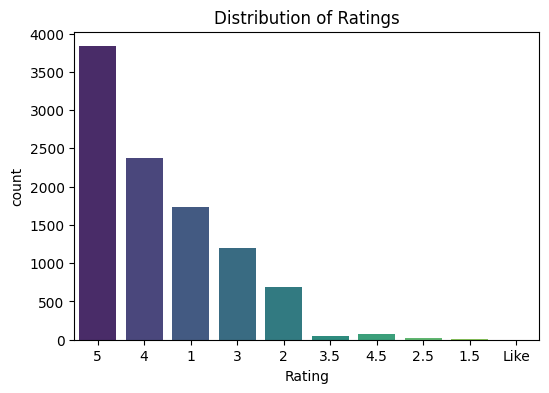

In [ ]:
# Start with visualization:

# Rating Distribution:

plt.figure(figsize=(6,4))
sns.countplot(x="Rating", data=df, palette="viridis")
plt.title("Distribution of Ratings")
plt.show()

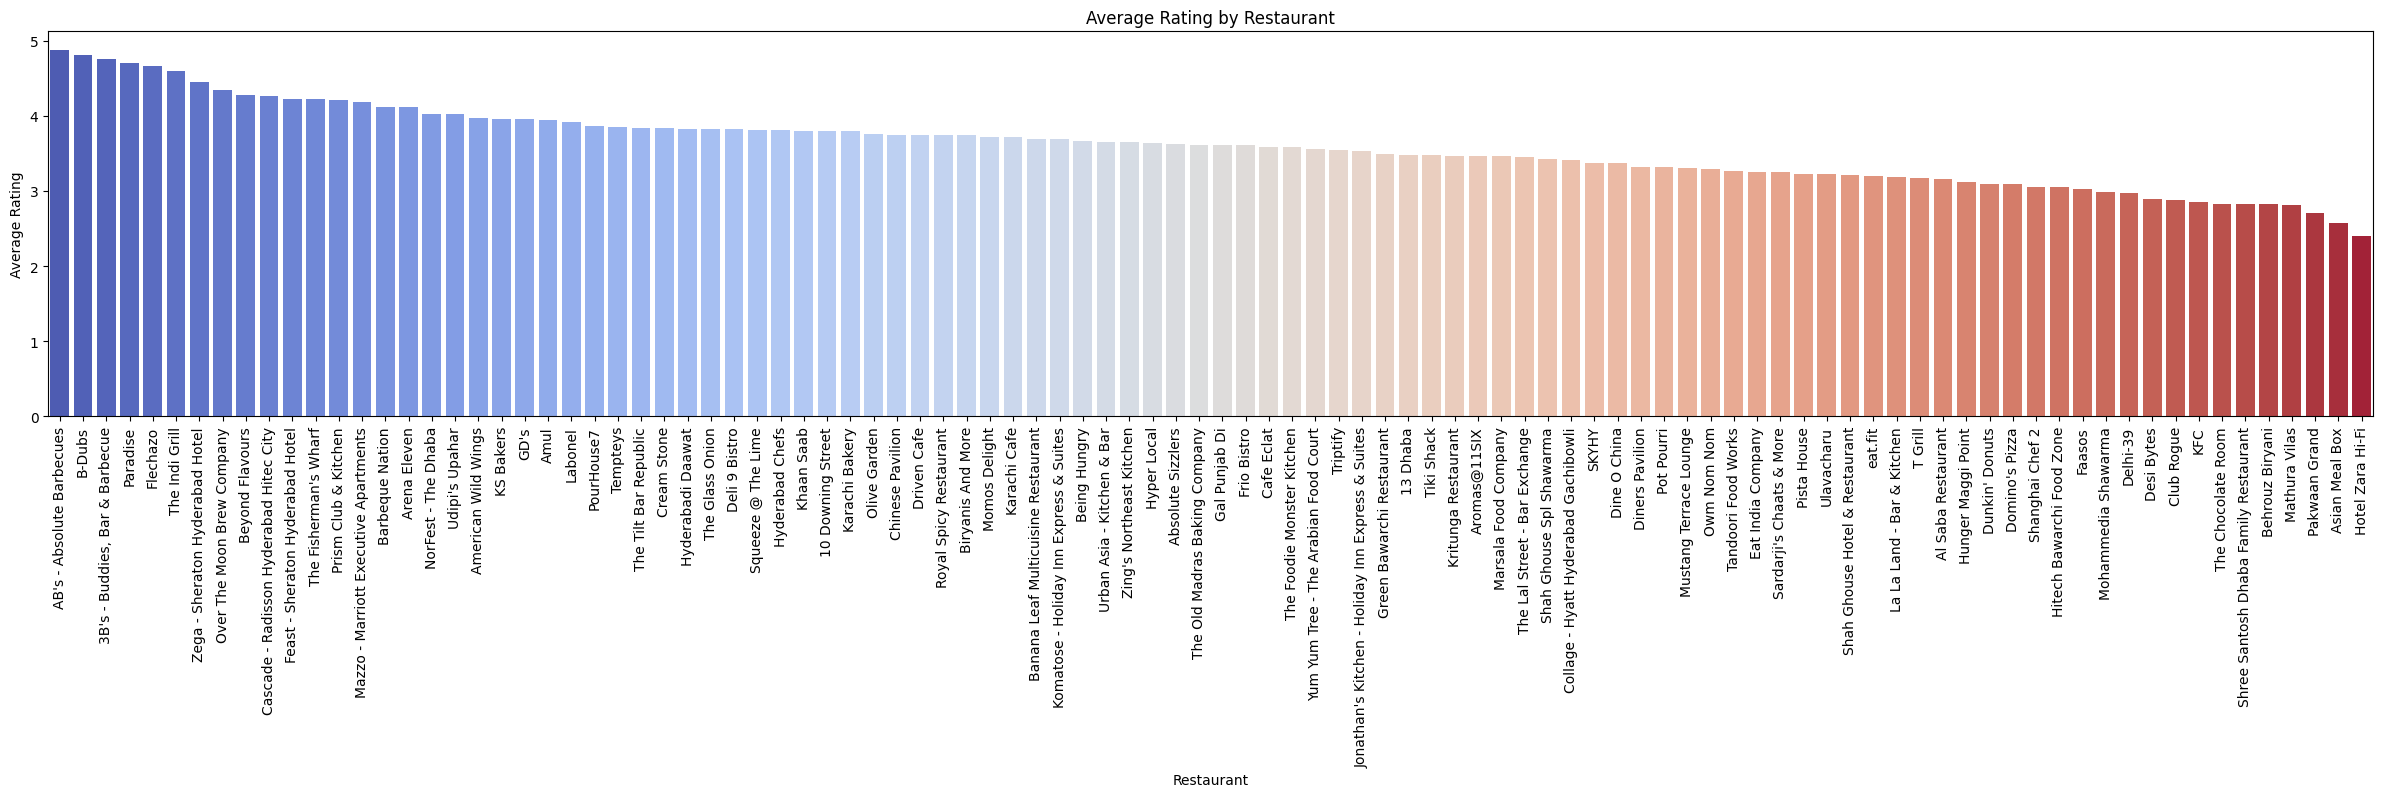

In [ ]:
# Average rating per resturant:
plt.figure(figsize=(30,5))
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
avg_rating = df.dropna(subset=['Rating']).groupby("Restaurant")["Rating"].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.ylabel("Average Rating")
plt.title("Average Rating by Restaurant")
plt.show()

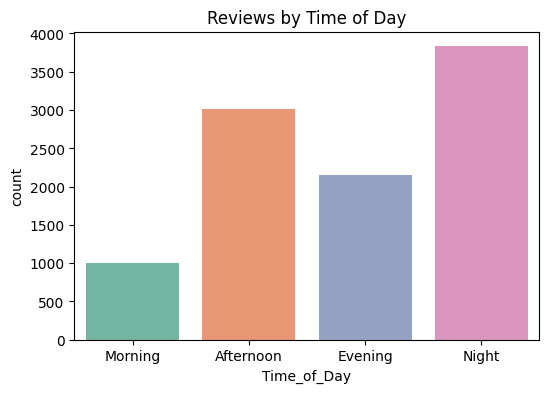

In [ ]:
# Reviews by time of the day:
plt.figure(figsize=(6,4))
sns.countplot(x="Time_of_Day", data=df, order=["Morning","Afternoon","Evening","Night"], palette="Set2")
plt.title("Reviews by Time of Day")
plt.show()

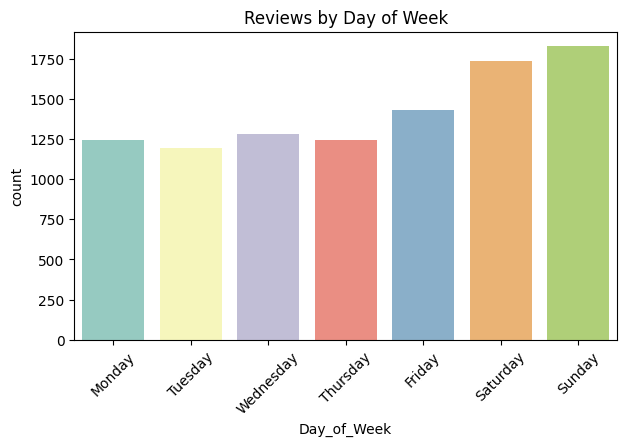

In [ ]:
# Reviews by the day of the week:

plt.figure(figsize=(7,4))
sns.countplot(x="Day_of_Week", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], palette="Set3")
plt.title("Reviews by Day of Week")
plt.xticks(rotation=45)
plt.show()

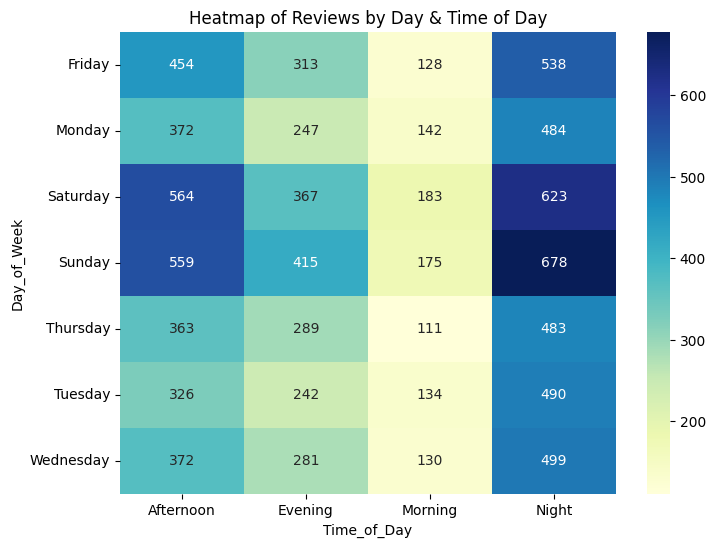

In [ ]:
# Heatmap:
heatmap_data = df.groupby(["Day_of_Week", "Time_of_Day"]).size().unstack(fill_value=0)
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Reviews by Day & Time of Day")
plt.show()

# Sentiment analysis using Hugging Face

In [ ]:
from transformers import pipeline

# Load the classification pipeline with the specified model
pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis")

# Classify a new sentence
sentence = "I love this product! It's amazing and works perfectly."
result = pipe(sentence)

# Print the result
print(result)

config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'Very Positive', 'score': 0.5586304068565369}]


In [ ]:
review_sentiments = []
for rev in df['Review']:
    if pd.notnull(rev): # Check for non-null reviews
        # Truncate the review to the maximum length of the model (512 tokens)
        result = pipe(rev, truncation=True, max_length=512)
        # The output is a list of dictionaries, we want the one with the highest score
        best_result = max(result, key=lambda x: x['score'])
        review_sentiments.append(best_result)
    else:
        # Handle the case where the review is null (optional, based on desired behavior)
        review_sentiments.append({'label': 'Neutral', 'score': 0.0}) # Or any other placeholder

# Add sentiment labels and scores to the DataFrame
df['Sentiment_Label'] = [s['label'] for s in review_sentiments]
df['Sentiment_Score'] = [s['score'] for s in review_sentiments]

display(df.head())

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Day,Month,Year,Day_of_Week,Only_Time,Time_of_Day,Sentiment_Label,Sentiment_Score
0,Beyond Flavours,Reviewer_1,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,25,5,2019,Saturday,15:54:00,Afternoon,Positive,0.920330
1,Beyond Flavours,Reviewer_2,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,25,5,2019,Saturday,14:20:00,Afternoon,Positive,0.907054
2,Beyond Flavours,Reviewer_3,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,24,5,2019,Friday,22:54:00,Night,Positive,0.751212
3,Beyond Flavours,Reviewer_4,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,24,5,2019,Friday,22:11:00,Night,Positive,0.815159
4,Beyond Flavours,Reviewer_5,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,24,5,2019,Friday,21:37:00,Night,Positive,0.874799


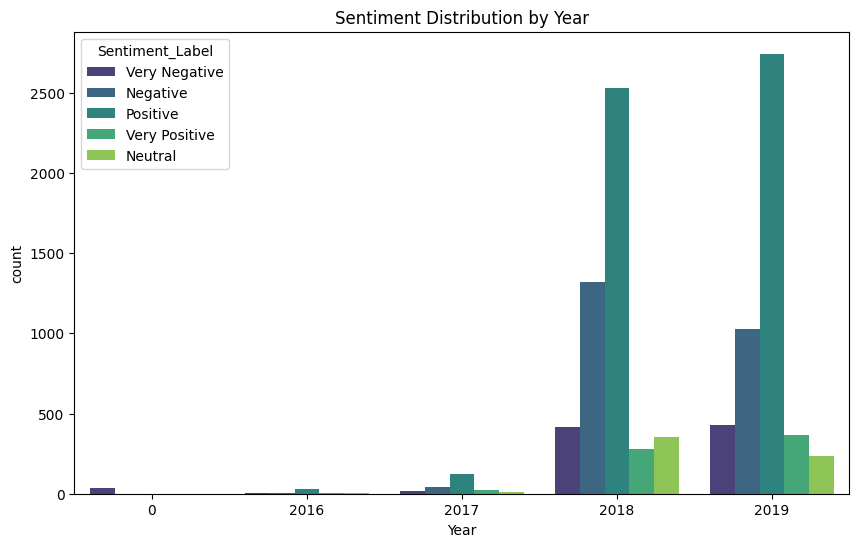

In [ ]:
# Visualize Sentiment vs Year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', hue='Sentiment_Label', palette='viridis')
plt.title('Sentiment Distribution by Year')
plt.show()

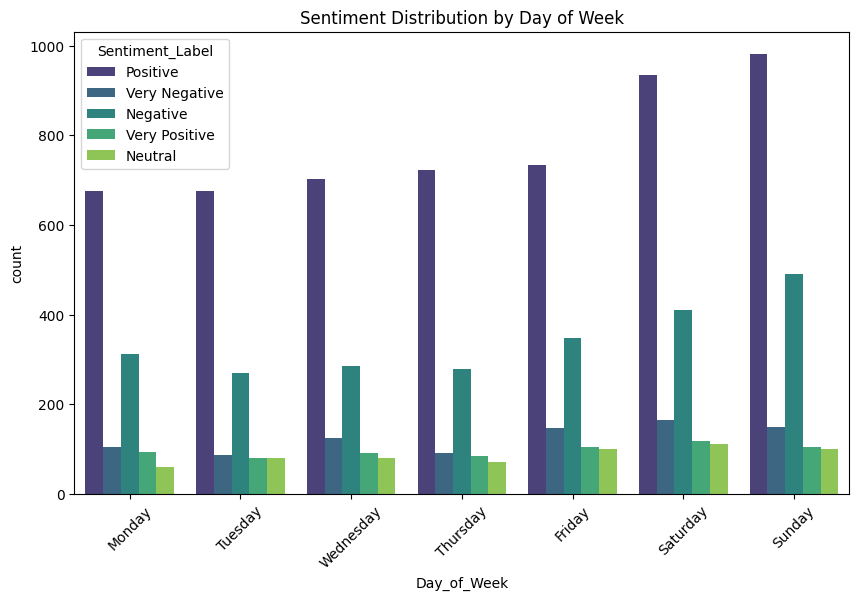

In [ ]:

# Visualize Sentiment vs Day of Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day_of_Week', hue='Sentiment_Label', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Sentiment Distribution by Day of Week')
plt.xticks(rotation=45)
plt.show()

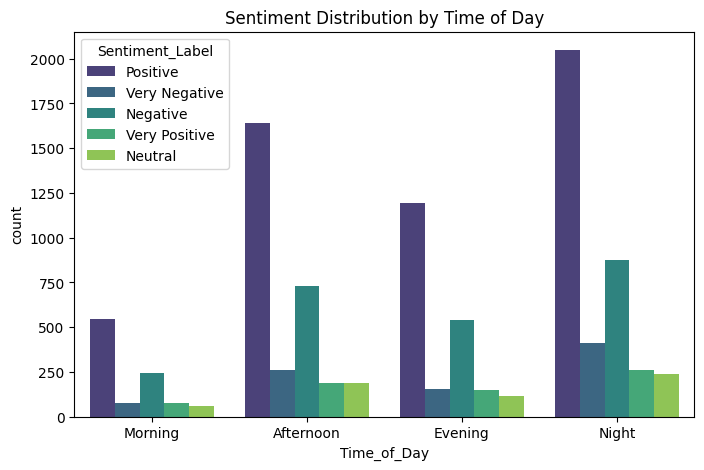

In [ ]:
# Visualize Sentiment vs Time of Day
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Time_of_Day', hue='Sentiment_Label', order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='viridis')
plt.title('Sentiment Distribution by Time of Day')
plt.show()

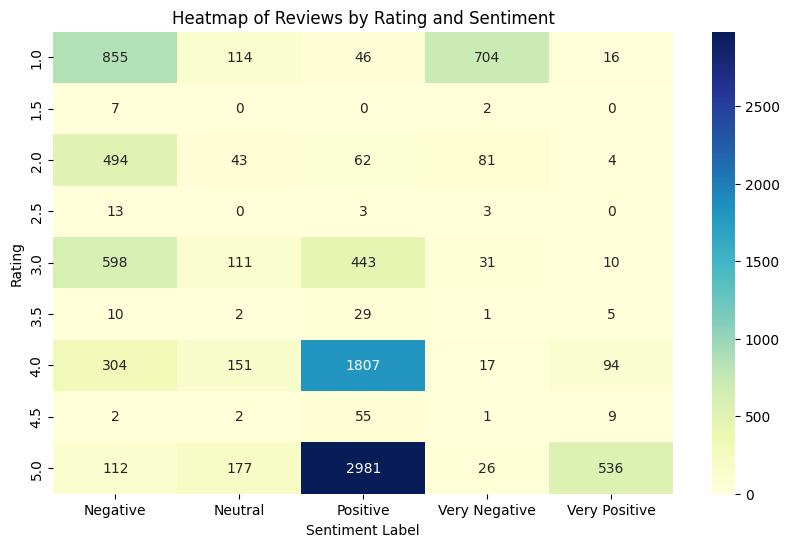

In [ ]:
# Heatmap for Rating vs Sentiment
heatmap_data_sentiment_rating = df.groupby(["Rating", "Sentiment_Label"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_sentiment_rating, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Reviews by Rating and Sentiment")
plt.xlabel("Sentiment Label")
plt.ylabel("Rating")
plt.show()

In [ ]:
# Filter the DataFrame
filtered_df = df[
    ((df['Sentiment_Label'] == 'Positive') | (df['Sentiment_Label'] == 'Very Positive')) &
    (df['Rating'] < 4)
]

# Display the filtered DataFrame
display(filtered_df)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Day,Month,Year,Day_of_Week,Only_Time,Time_of_Day,Sentiment_Label,Sentiment_Score
30,Beyond Flavours,Reviewer_31,"Short review: Decent breads and starters, bad ...",3.0,"9 Reviews , 8 Followers",2019-05-20 00:35:00,0,20,5,2019,Monday,00:35:00,Night,Positive,0.560377
56,Beyond Flavours,Reviewer_57,We went for lunch buffet yesterday and took a ...,3.0,"25 Reviews , 24 Followers",2019-05-16 07:13:00,0,16,5,2019,Thursday,07:13:00,Morning,Positive,0.769891
73,Beyond Flavours,Reviewer_74,We happened to go to this place on last sunday...,3.0,"51 Reviews , 232 Followers",2019-05-14 16:26:00,0,14,5,2019,Tuesday,16:26:00,Afternoon,Positive,0.826505
223,Flechazo,Reviewer_224,I went to this place for lunch buffet by seein...,3.0,"12 Reviews , 5 Followers",2019-05-12 19:49:00,0,12,5,2019,Sunday,19:49:00,Evening,Positive,0.710089
336,Shah Ghouse Hotel & Restaurant,Reviewer_336,Shwarma was really good. Biryani was average w...,3.0,"65 Reviews , 12 Followers",2019-04-30 00:32:00,0,30,4,2019,Tuesday,00:32:00,Night,Positive,0.909623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,Chinese Pavilion,Reviewer_4319,It's very over rated on Zomato. Went to check ...,3.0,"37 Reviews , 115 Followers",2017-01-07 00:46:00,0,7,1,2017,Saturday,00:46:00,Night,Positive,0.735842
9974,Chinese Pavilion,Reviewer_7427,Went there with friends.The staff was polite.H...,3.5,"251 Reviews , 576 Followers",2016-12-02 10:57:00,0,2,12,2016,Friday,10:57:00,Morning,Positive,0.877450
9985,Chinese Pavilion,Reviewer_7434,Searched for Chinese cuisine nearby and I foun...,3.5,"138 Reviews , 540 Followers",2016-08-14 22:37:00,20,14,8,2016,Sunday,22:37:00,Night,Positive,0.752652
9988,Chinese Pavilion,Reviewer_7437,Had a mixed experience... Cant say it is bad c...,3.0,"78 Reviews , 924 Followers",2016-07-23 22:12:00,0,23,7,2016,Saturday,22:12:00,Night,Positive,0.904590
